In [1]:
# install.packages('ROCR', repos='http://cran.us.r-project.org')

**Principal component analysis**

In [2]:
states=row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [3]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [4]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [5]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

scale true takes care of average = 0, and variance = 1.

In [6]:
pr.out=prcomp(USArrests, scale=TRUE)

In [7]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

Center and scale are average and variance of input data

In [8]:
pr.out$center
pr.out$scale

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

The loading (or, rotation matrix)

In [9]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


Number of PC is equal to min(n-1, p)

In [10]:
dim(pr.out$x)

[1] 50  4

arrows are scaled to represent the loadings

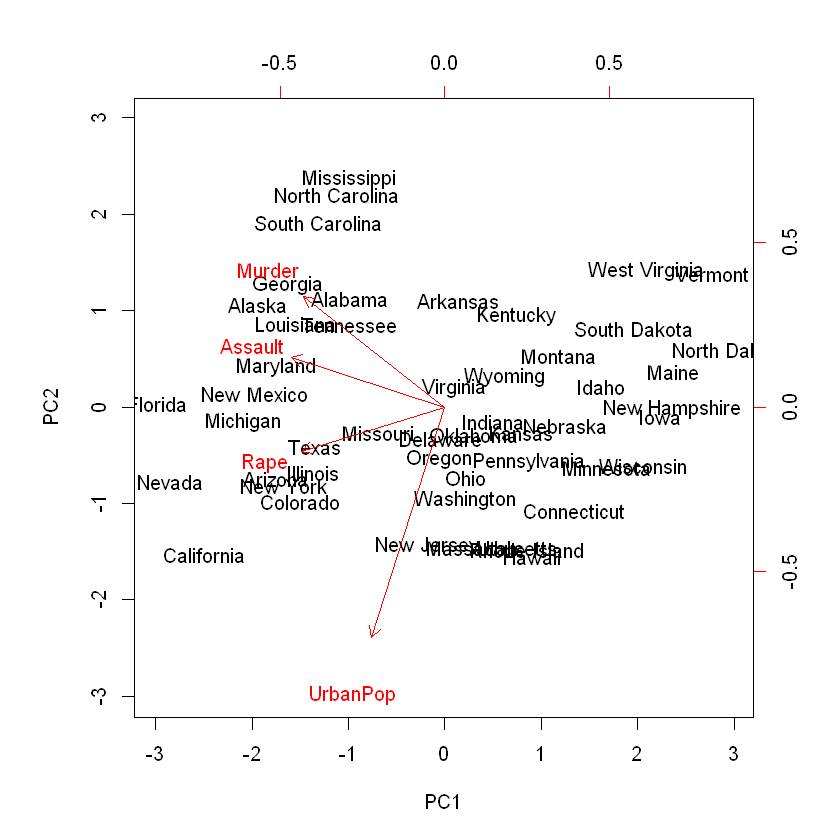

In [11]:
biplot(pr.out, scale=0)

Take care of arbitrary minus signs in PC calculation

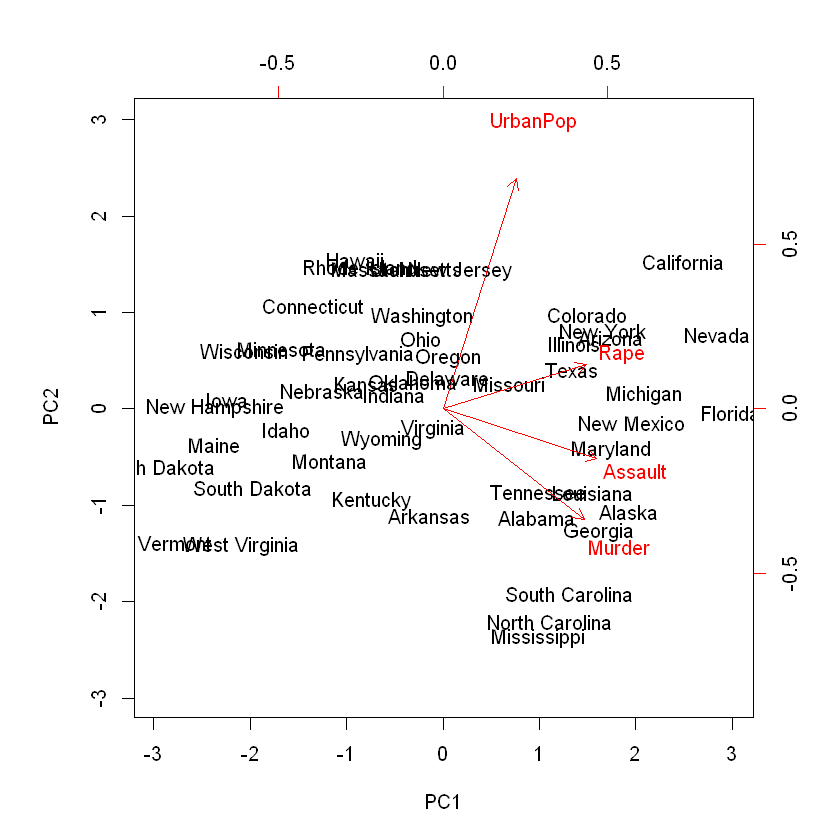

In [12]:
pr.out$rotation=-pr.out$rotation
pr.out$x=-pr.out$x
biplot(pr.out, scale=0)

Standard deviation of each principal component

In [13]:
pr.out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Variances of the PCs

In [14]:
pr.var=pr.out$sdev^2
pr.var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [15]:
pve=pr.var/sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

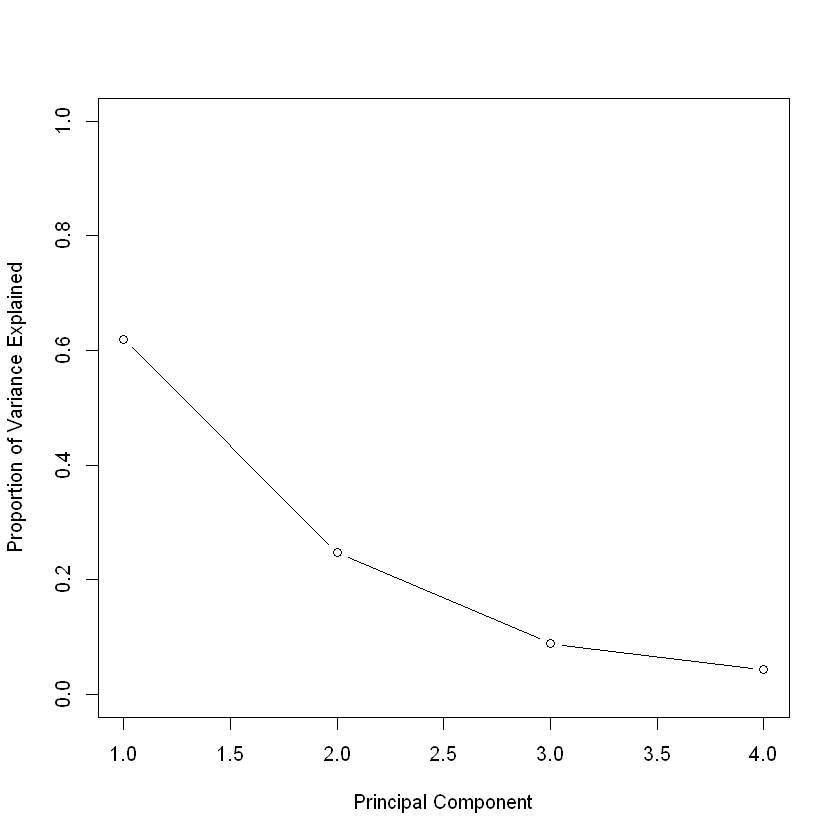

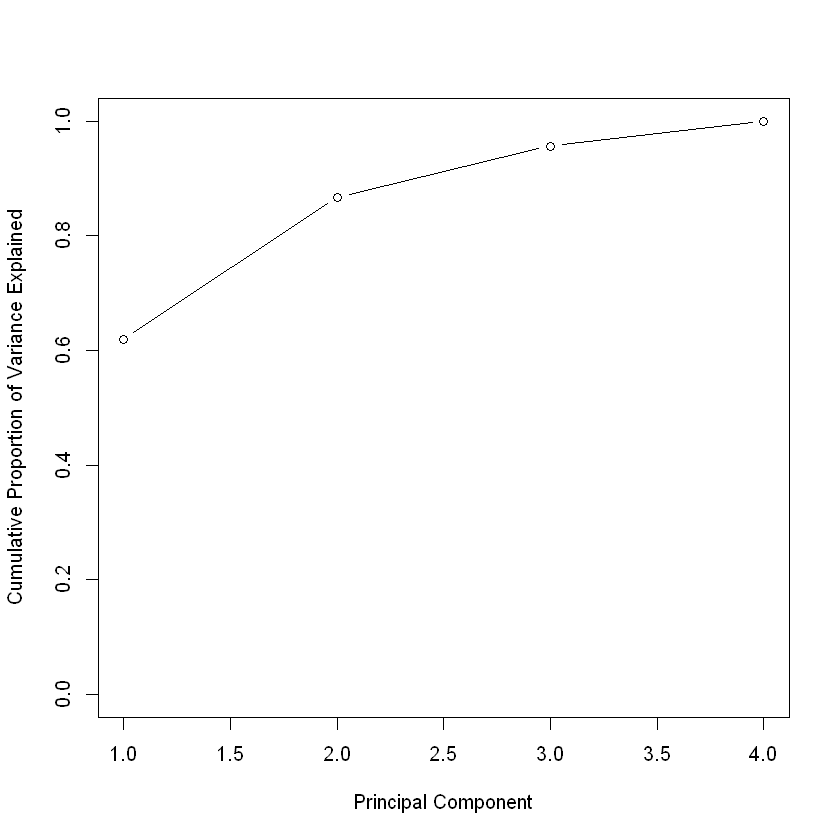

In [16]:
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1),type='b')

Example of cumulative sum

In [17]:
a=c(1,2,8,-3)
cumsum(a)

[1]  1  3 11  8

**K-Means clustering**

Create artificial data set with two clear clusters

In [18]:
set.seed(2)
x=matrix(rnorm(50*2), ncol=2)
x[1:25,1]=x[1:25,1]+3
x[1:25,2]=x[1:25,2]-4

In [19]:
km.out=kmeans(x,2,nstart=20)

In [20]:
km.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

In [21]:
km.out

K-means clustering with 2 clusters of sizes 25, 25

Cluster means:
        [,1]       [,2]
1 -0.1956978 -0.1848774
2  3.3339737 -4.0761910

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 65.40068 63.20595
 (between_SS / total_SS =  72.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

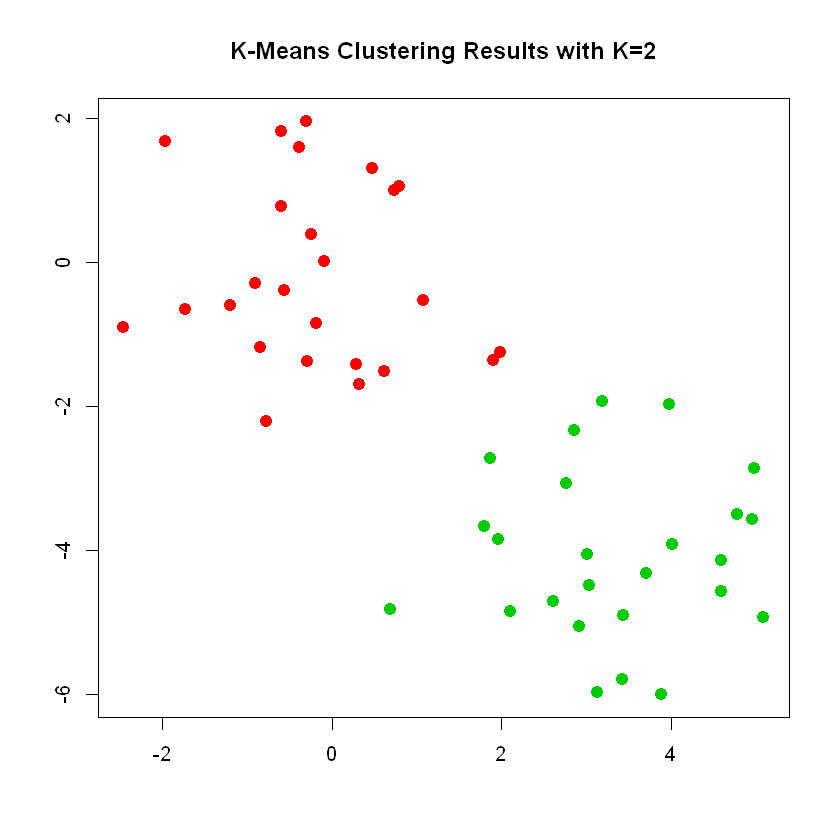

In [22]:
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=2", xlab="", ylab="", pch=20, cex=2)

totss	
The total sum of squares.

withinss	
Vector of within-cluster sum of squares, one component per cluster.

tot.withinss	
Total within-cluster sum of squares, i.e. sum(withinss).

betweenss	
The between-cluster sum of squares, i.e. totss-tot.withinss.

In [23]:
set.seed(4)
km.out=kmeans(x,3,nstart=20)
km.out

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

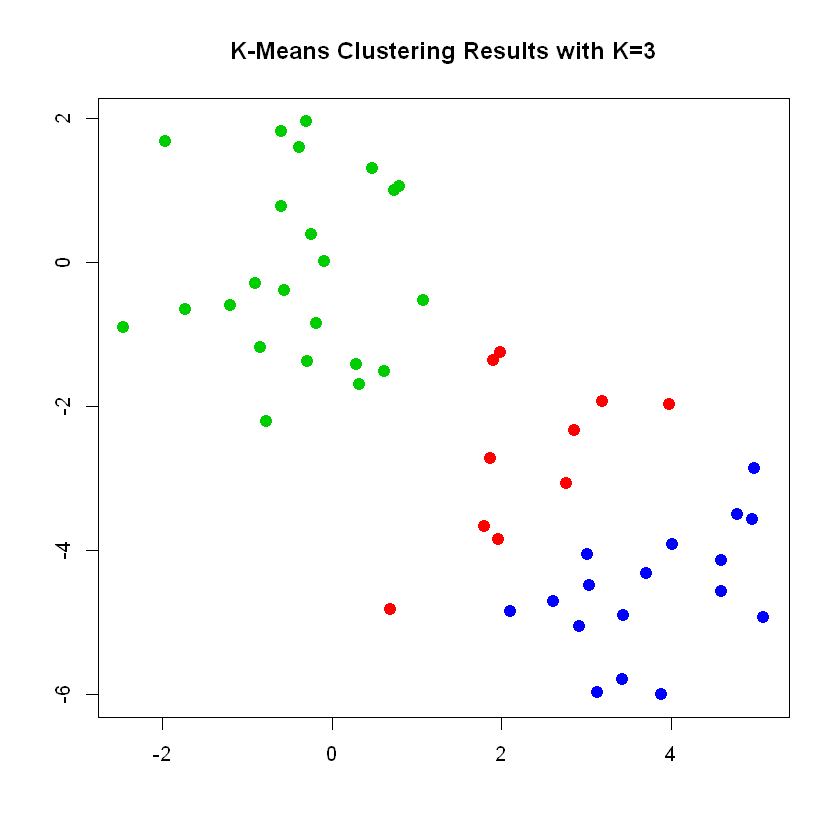

In [24]:
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=3", xlab="", ylab="", pch=20, cex=2)

Use different random initializations to get a good clustering!

In [25]:
set.seed(3)
km.out=kmeans(x,3,nstart=1)
km.out$tot.withinss
km.out=kmeans(x,3,nstart=20)
km.out$tot.withinss

[1] 104.3319

[1] 97.97927

**Hierarchical clustering**

In [26]:
hc.complete=hclust(dist(x), method="complete")
hc.average=hclust(dist(x), method="average")
hc.single=hclust(dist(x), method="single")

Notice the differences in height
For Single linkage, there is a Singleton -> because of linkage metric

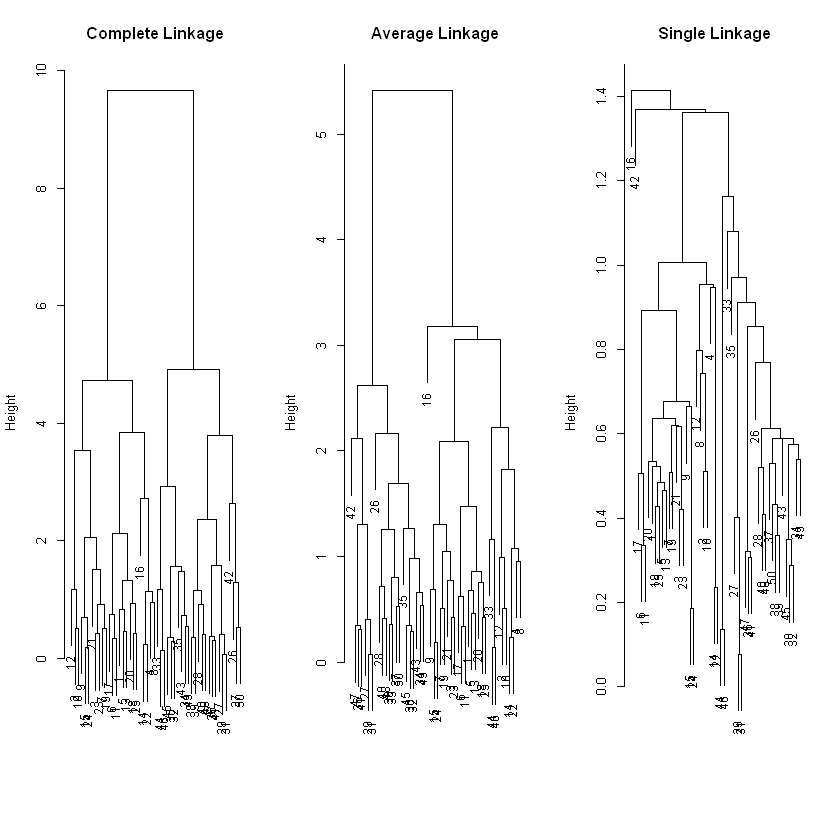

In [27]:
par(mfrow=c(1,3))
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)

In [28]:
cutree(hc.complete, 2)
cutree(hc.average, 2)
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

A cut at 4 produces better results, although the singleton still is present.

In [29]:
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

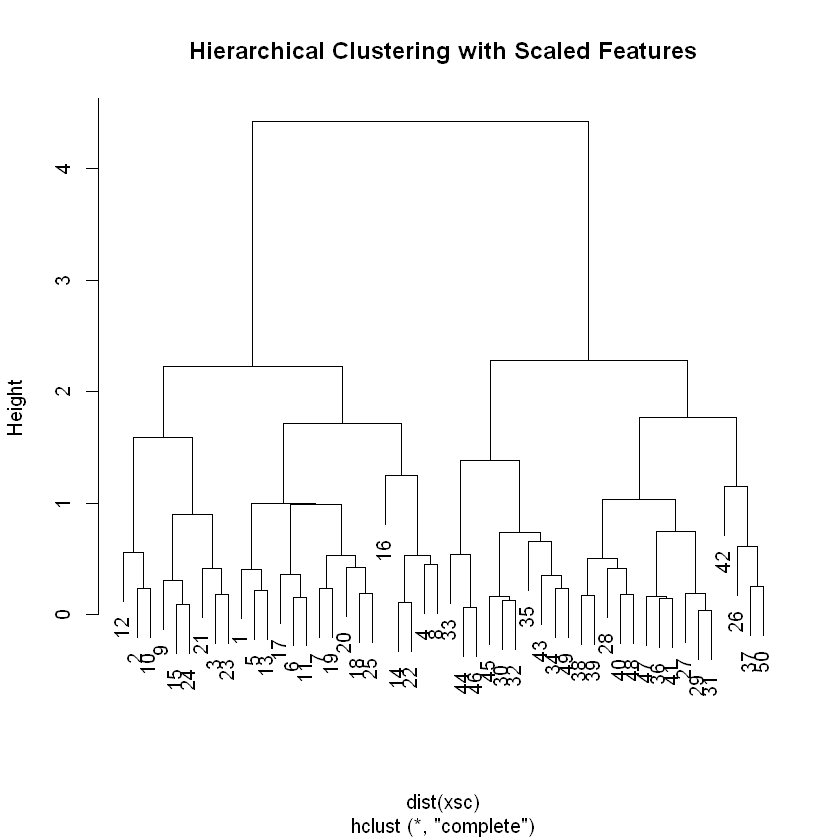

In [30]:
xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")

Because two 2-dimensional data points are always correlated with absolute value 1, we create a 3-dimensional Gaussian distributed data set

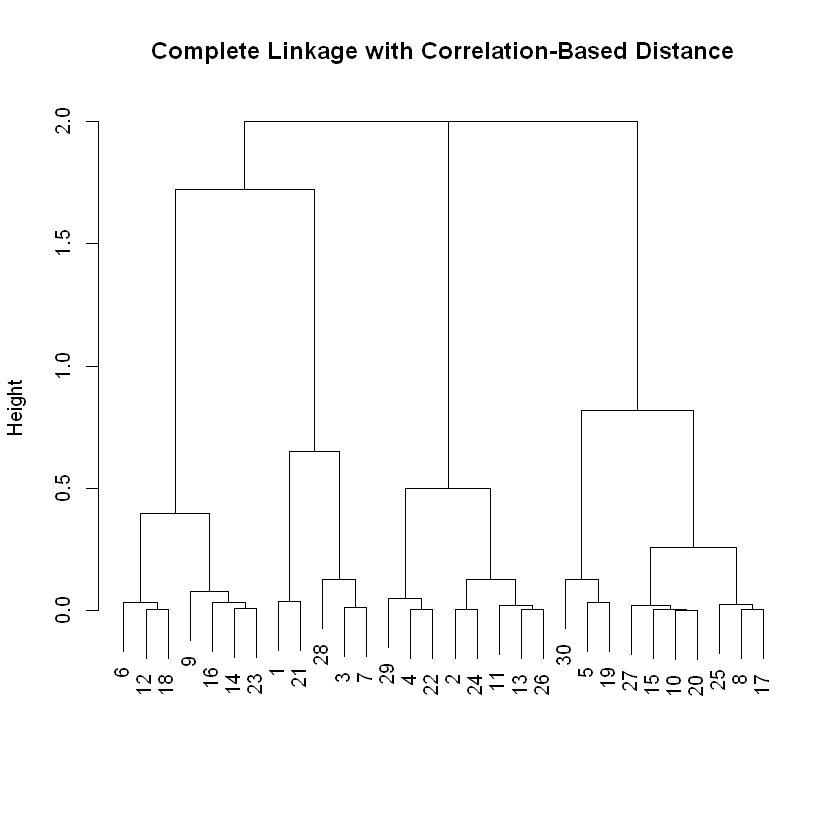

In [31]:
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))   # t(x) is the transpose of x
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance", xlab="", sub="")

See separate paper for explanation

In [58]:
# example of 2 dimensions correlation matrix
x2=matrix(rnorm(30*2), ncol=2)
t(x2)
cor(t(x2))
dim(cor(t(x2)))
cor(x2)

0.1500692,0.8171303,0.4083539,0.1426115,-0.103639,0.7019326,1.0407341,0.04912983,1.754303,0.05221282,...,0.09210408,-0.06383213,-0.83604492,1.72874451,-0.967083,0.5663589,-0.4506211,-1.097881,-1.2546082,2.156679
0.3402011,0.5370227,0.9584032,1.4217798,-0.166261,0.7882430,-0.6262567,2.00945360,1.481254,0.16474888,...,1.15223751,0.72033482,0.06455211,-0.06970907,1.194798,-1.1345910,1.0648417,0.051141,0.8077924,1.341885


1,-1,1,1,-1,1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1
-1,1,-1,-1,1,-1,1,-1,1,-1,...,-1,-1,-1,1,-1,1,-1,-1,-1,1
1,-1,1,1,-1,1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1
1,-1,1,1,-1,1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1
-1,1,-1,-1,1,-1,1,-1,1,-1,...,-1,-1,-1,1,-1,1,-1,-1,-1,1
1,-1,1,1,-1,1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1
-1,1,-1,-1,1,-1,1,-1,1,-1,...,-1,-1,-1,1,-1,1,-1,-1,-1,1
1,-1,1,1,-1,1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1
-1,1,-1,-1,1,-1,1,-1,1,-1,...,-1,-1,-1,1,-1,1,-1,-1,-1,1
1,-1,1,1,-1,1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1
1,-1,1,1,-1,1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,-1


[1] 30 30

1.00000000,0.08903552
0.08903552,1.00000000


**Lab 3: NCI60 Data Example**

We give an example on gene-expression data

In [59]:
library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data

In [60]:
dim(nci.data)

[1]   64 6830

Type of cancer cell data in the dataset. There are 64 cell samples for 6830 gene expressions.

In [61]:
nci.labs[1:4]
table(nci.labs)

[1] "CNS"   "CNS"   "CNS"   "RENAL"

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

In [35]:
pr.out=prcomp(nci.data, scale=TRUE)

In [36]:
Cols=function(vec){
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
  }

In [62]:
On the whole, cells with similar color (same group) occur close to each other

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: On the
       ^


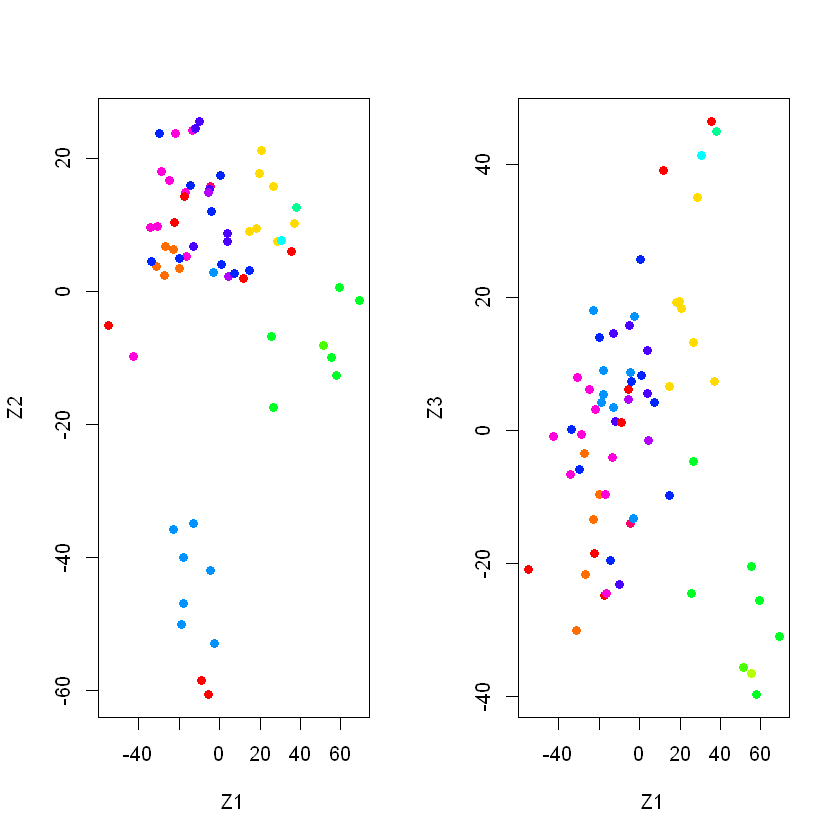

In [37]:
par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z3")

In [38]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

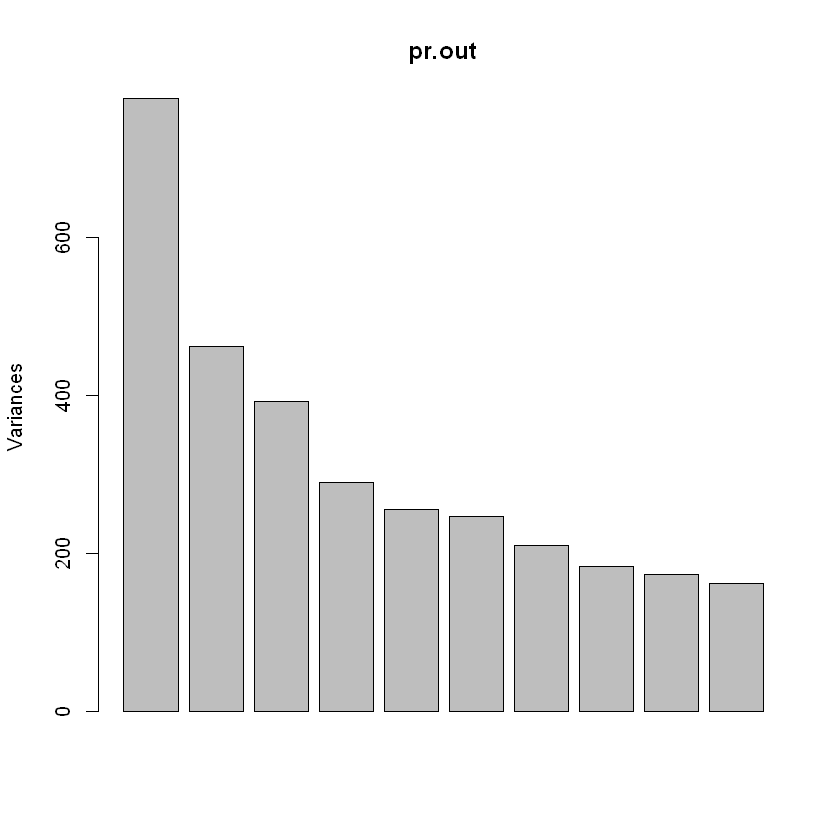

In [39]:
plot(pr.out)

Notice the elbow around 7 PCs

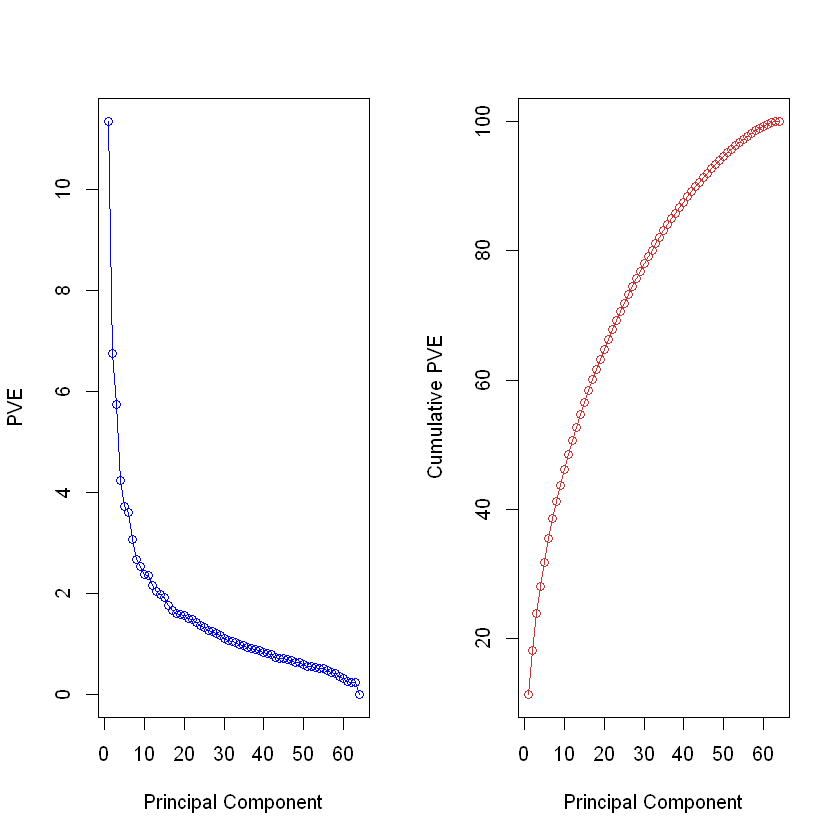

In [40]:
pve=100*pr.out$sdev^2/sum(pr.out$sdev^2)
par(mfrow=c(1,2))
plot(pve,  type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

In [41]:
sd.data=scale(nci.data)

Better dendrograms are in the book. Notice the 'trailing' of single linkage.

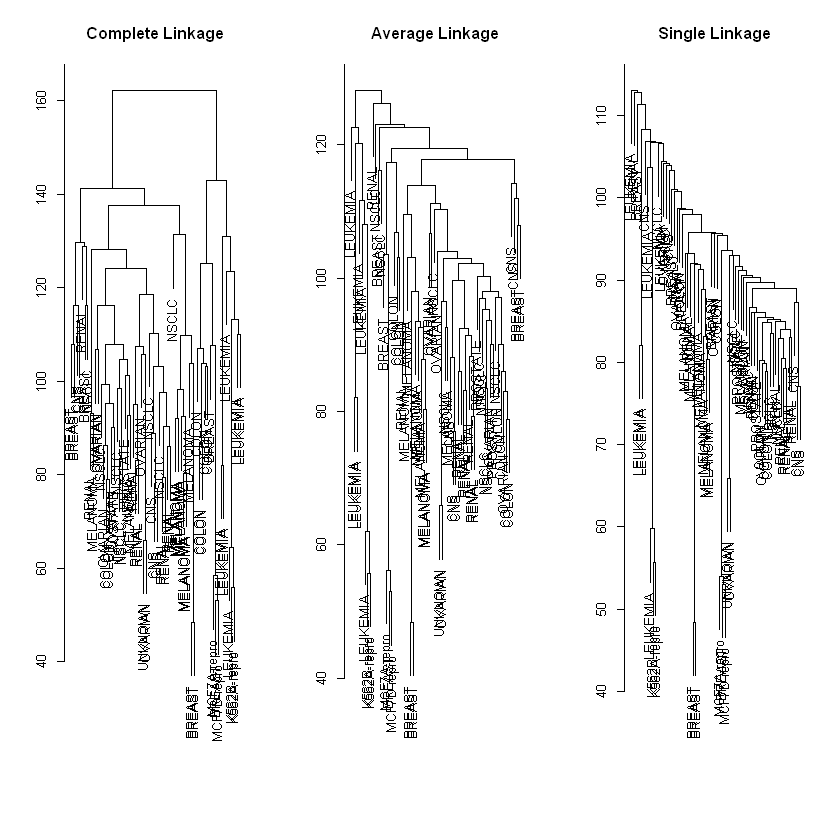

In [42]:
par(mfrow=c(1,3))
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main="Complete Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="single"), labels=nci.labs,  main="Single Linkage", xlab="", sub="",ylab="")

In [43]:
hc.out=hclust(dist(sd.data))
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

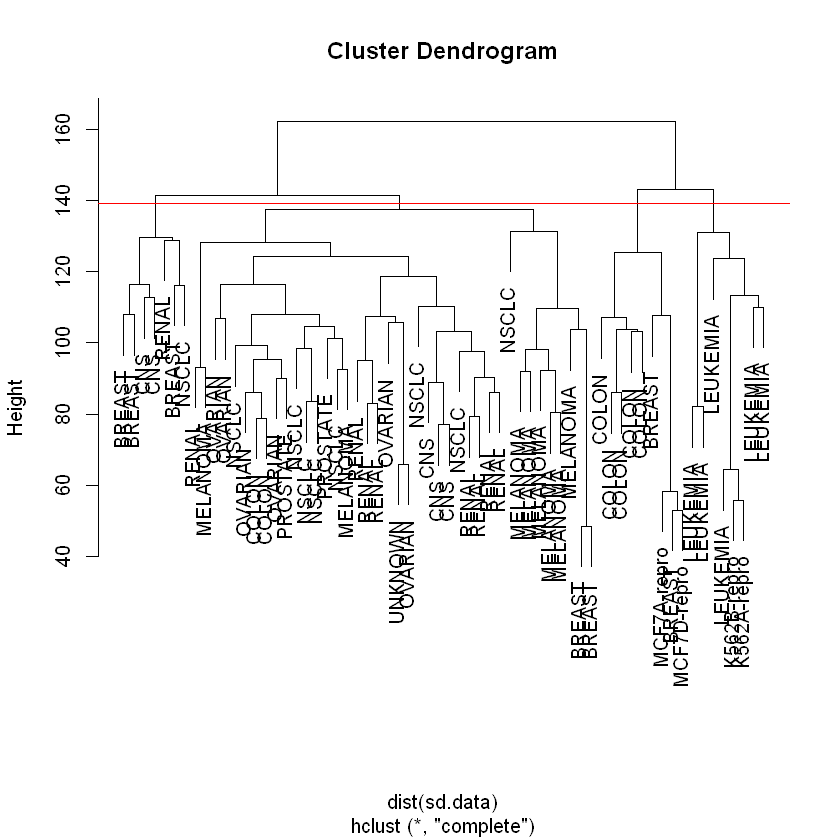

In [44]:
par(mfrow=c(1,1))
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")

In [45]:
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


Compare K-means result with hierarchical clustering.

In [46]:
set.seed(2)
km.out=kmeans(sd.data, 4, nstart=20)
km.clusters=km.out$cluster
table(km.clusters,hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2  0  0  8  0
          3  9  0  0  0
          4 20  7  0  0

Hierarchical clustering on the first Five PCs. Can be advantageous because it denoises the data.

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

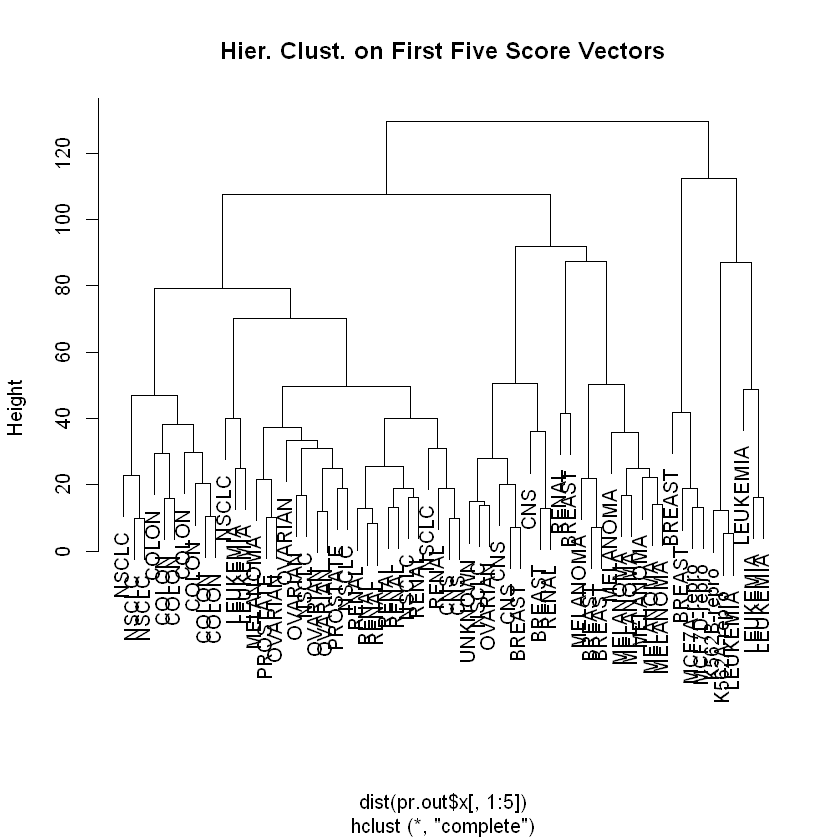

In [47]:
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")
table(cutree(hc.out,4), nci.labs)